In [1]:
# Лучше устанавливать из консоли а не из юпитера, иначе возможны проблемы с установкой lightgbm 
#!pip install seaborn matplotlib pandas scikit-learn transliterate lightgbm 

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from IPython.display import display
import re
from transliterate import translit
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

pd.options.display.float_format = '{:.1f}'.format
pd.set_option('display.max_columns', None)

### Читаем таблицы за 2019, 2020, 2021 годы. Переводим русский язык в транслит для lightgbm


In [3]:
#2019
df_2019 = pd.read_csv('agents2019.csv', index_col = 'Unnamed: 0')

renamed_headers = [translit(x,'ru', reversed=True) for x in df_2019.columns]
ren = dict(zip(df_2019.columns, renamed_headers))
df_2019.rename(columns=ren, inplace=True)
df_2019.rename(columns=lambda x: x.replace('.', ''), inplace=True)

display(df_2019)

#2020
df_2020 = pd.read_csv('agents2020.csv')

renamed_headers = [translit(x,'ru', reversed=True) for x in df_2020.columns]
ren = dict(zip(df_2020.columns, renamed_headers))
df_2020.rename(columns=ren, inplace=True)
df_2020.rename(columns=lambda x: x.replace('.', ''), inplace=True)
#Replace X in Fakt
fact_columns = [x for x in df_2020.columns if 'Fakt' in x]
df_2020_facts = df_2020.loc[:, fact_columns[0]:fact_columns[-1]]
WW = df_2020_facts.iat[1,1]
df_2020 = df_2020.replace([WW, 'Н/Д'] ,np.NAN)
display(df_2020)


#2021
df_2021 = pd.read_csv('agents2021.csv')

renamed_headers = [translit(x,'ru', reversed=True) for x in df_2021.columns]
ren = dict(zip(df_2021.columns, renamed_headers))
df_2021.rename(columns=ren, inplace=True)
df_2021.rename(columns=lambda x: x.replace('.', ''), inplace=True)

display(df_2021)

,Naimenovanie DP,"Maks PDZ za 2019 god, dnej","Sred PDZ za 2019 god, dnej","Kol-vo prosrochek svyshe 5-ti dnej za 2019 god, sht","Obschaja summa PDZ svyshe 5-ti dnej za 2019 god, rub","Kol-vo raz PDZ za 2019 god, sht","2016, Nematerial'nye aktivy, RUB","2017, Nematerial'nye aktivy, RUB","2018, Nematerial'nye aktivy, RUB","2016, Osnovnye sredstva , RUB","2017, Osnovnye sredstva , RUB","2018, Osnovnye sredstva , RUB","2016, Vneoborotnye aktivy, RUB","2017, Vneoborotnye aktivy, RUB","2018, Vneoborotnye aktivy, RUB","2016, Debitorskaja zadolzhennost', RUB","2017, Debitorskaja zadolzhennost', RUB","2018, Debitorskaja zadolzhennost', RUB","2016, Oborotnye aktivy, RUB","2017, Oborotnye aktivy, RUB","2018, Oborotnye aktivy, RUB","2016, Ustavnyj kapital , RUB","2017, Ustavnyj kapital , RUB","2018, Ustavnyj kapital , RUB","2016, Kapital i rezervy, RUB","2017, Kapital i rezervy, RUB","2018, Kapital i rezervy, RUB","2016, Zaemnye sredstva (dolgosrochnye), RUB","2017, Zaemnye sredstva (dolgosrochnye), RUB","2018, Zaemnye sredstva (dolgosrochnye), RUB","2016, Dolgosrochnye objazatel'stva, RUB","2017, Dolgosrochnye objazatel'stva, RUB","2018, Dolgosrochnye objazatel'stva, RUB","2016, Zaemnye sredstva (kratkosrochnye), RUB","2017, Zaemnye sredstva (kratkosrochnye), RUB","2018, Zaemnye sredstva (kratkosrochnye), RUB","2016, Kreditorskaja zadolzhennost', RUB","2017, Kreditorskaja zadolzhennost', RUB","2018, Kreditorskaja zadolzhennost', RUB","2016, Kratkosrochnye objazatel'stva, RUB","2017, Kratkosrochnye objazatel'stva, RUB","2018, Kratkosrochnye objazatel'stva, RUB","2016, Vyruchka, RUB","2017, Vyruchka, RUB","2018, Vyruchka, RUB","2016, Sebestoimost' prodazh, RUB","2017, Sebestoimost' prodazh, RUB","2018, Sebestoimost' prodazh, RUB","2016, Pribyl' (ubytok) do nalogooblozhenija , RUB","2017, Pribyl' (ubytok) do nalogooblozhenija , RUB","2018, Pribyl' (ubytok) do nalogooblozhenija , RUB","2016, Pribyl' (ubytok) ot prodazhi, RUB","2017, Pribyl' (ubytok) ot prodazhi, RUB","2018, Pribyl' (ubytok) ot prodazhi, RUB"
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0.0,0,0.0,0,2895541.4,6245859.9,9050955.4,1889724203.8,1803724203.8,2145239490.4,1928685350.3,1880842038.2,2440077707.0,3583765605.1,3683358598.7,3475461146.5,5159380254.8,5897326114.6,6077447770.7,629400000.0,629400000.0,629400000.0,2673019745.2,2971017197.5,2289273885.4,0.0,0.0,0.0,249877707.0,258973248.4,271221019.1,0.0,0.0,392391719.7,4080056051.0,4452921656.1,5476906369.4,4165168152.9,4548177707.0,5957030573.2,26676980254.8,41626929936.3,37039522293.0,21568144586.0,33354425477.7,34383128662.4,3179696815.3,6167666879.0,746182802.5,3280355414.0,6200119745.2,871619108.3
1,1,0,0.0,0,0.0,0,0.0,38853.5,34394.9,144810828.0,148715286.6,152642675.2,145678343.9,149798726.1,153892356.7,55847770.7,46782165.6,156347770.7,148915286.6,189898726.1,291463694.3,1345859.9,1345859.9,1345859.9,272664968.2,277408280.3,310658598.7,0.0,0.0,0.0,3108280.3,4528025.5,5033758.0,9745222.9,47606369.4,63498726.1,9075159.2,10154777.1,66164968.2,18820382.2,57761146.5,129663694.3,255489808.9,257366879.0,543430573.2,205681528.7,205532484.1,416979617.8,12123566.9,6944586.0,44800636.9,16300636.9,11091719.7,51357324.8
2,2,7,5.5,1,132825.3,2,2468152.9,12880254.8,8694904.5,969806369.4,944416560.5,928738853.5,973274522.3,1036412101.9,1018682165.6,281467515.9,232107006.4,228049681.5,1286917197.5,1489083439.5,1590216560.5,19644586.0,19644586.0,19644586.0,2110424840.8,2339440127.4,2378698089.2,0.0,0.0,0.0,13398089.2,11831210.2,2843949.0,0.0,0.0,0.0,82468789.8,88571974.5,123771337.6,136368789.8,174224203.8,227356687.9,2786577070.1,2699396815.3,2592420382.2,2038075796.2,2178598089.2,2316724203.8,502666242.0,364422929.9,85529936.3,414858598.7,161131847.1,-92989808.9
3,3,0,0.0,0,0.0,0,0.0,0.0,0.0,8874127388.5,10609771337.6,14264915923.6,10978240127.4,12799207643.3,18201022293.0,3047629936.3,3525893630.6,5362189808.9,4842292993.6,5397731847.1,7929949681.5,7951592.4,20382165.6,20382165.6,8408440127.4,10550740127

,Naimenovanie DP,Fakt 1,Fakt 2,Fakt 3,Fakt 4,Fakt 5,Fakt 6,Fakt 7,Fakt 8,Fakt 9,Fakt 10,Fakt 11,Fakt 12,Fakt 13,Fakt 14,Fakt 15,Fakt 16,Fakt 17,Fakt 18,Fakt 19,Fakt 20,Fakt 21,Fakt 22,Fakt 23,Fakt 24,Fakt 25,Fakt 26,Fakt 27,Fakt 28,Fakt 29,Fakt 30,Fakt 31,Fakt 32,Fakt 33,Fakt 34,Fakt 35,Fakt 36,Fakt 37,Fakt 38,Fakt 39,Fakt 40,Fakt 41,Fakt 42,Fakt 43,Fakt 44,Fakt 45,Fakt 46,Fakt 47,Fakt 48,Fakt 49,Fakt 50,Fakt 51,Fakt 52,Fakt 53,Fakt 54,Fakt 55,Fakt 56,Fakt 57,Fakt 58,Fakt 59,Fakt 60,Itogo,"Maks PDZ za 2020 god, dnej","Sred PDZ za 2020 god, dnej","Kol-vo prosrochek svyshe 5-ti dnej za 2020 god, sht","Obschaja summa PDZ svyshe 5-ti dnej za 2020 god, rub","Kol-vo raz PDZ za 2020 god, sht","2016, Nematerial'nye aktivy, RUB","2017, Nematerial'nye aktivy, RUB","2018, Nematerial'nye aktivy, RUB","2019, Nematerial'nye aktivy, RUB","2016, Osnovnye sredstva , RUB","2017, Osnovnye sredstva , RUB","2018, Osnovnye sredstva , RUB","2019, Osnovnye sredstva , RUB","2016, Vneoborotnye aktivy, RUB","2017, Vneoborotnye aktivy, RUB","2018, Vneoborotnye aktivy, RUB","2019, Vneoborotnye aktivy, RUB","2016, Debitorskaja zadolzhennost', RUB","2017, Debitorskaja zadolzhennost', RUB","2018, Debitorskaja zadolzhennost', RUB","2019, Debitorskaja zadolzhennost', RUB","2016, Oborotnye aktivy, RUB","2017, Oborotnye aktivy, RUB","2018, Oborotnye aktivy, RUB","2019, Oborotnye aktivy, RUB","2016, Ustavnyj kapital , RUB","2017, Ustavnyj kapital , RUB","2018, Ustavnyj kapital , RUB","2019, Ustavnyj kapital , RUB","2016, Kapital i rezervy, RUB","2017, Kapital i rezervy, RUB","2018, Kapital i rezervy, RUB","2019, Kapital i rezervy, RUB","2016, Zaemnye sredstva (dolgosrochnye), RUB","2017, Zaemnye sredstva (dolgosrochnye), RUB","2018, Zaemnye sredstva (dolgosrochnye), RUB","2019, Zaemnye sredstva (dolgosrochnye), RUB","2016, Dolgosrochnye objazatel'stva, RUB","2017, Dolgosrochnye objazatel'stva, RUB","2018, Dolgosrochnye objazatel'stva, RUB","2019, Dolgosrochnye objazatel'stva, RUB","2016, Zaemnye sredstva (kratkosrochnye), RUB","2017, Zaemnye sredstva (kratkosrochnye), RUB","2018, Zaemnye sredstva (kratkosrochnye), RUB","2019, Zaemnye sredstva (kratkosrochnye), RUB","2016, Kreditorskaja zadolzhennost', RUB","2017, Kreditorskaja zadolzhennost', RUB","2018, Kreditorskaja zadolzhennost', RUB","2019, Kreditorskaja zadolzhennost', RUB","2016, Kratkosrochnye objazatel'stva, RUB","2017, Kratkosrochnye objazatel'stva, RUB","2018, Kratkosrochnye objazatel'stva, RUB","2019, Kratkosrochnye objazatel'stva, RUB","2016, Vyruchka, RUB","2017, Vyruchka, RUB","2018, Vyruchka, RUB","2019, Vyruchka, RUB","2016, Sebestoimost' prodazh, RUB","2017, Sebestoimost' prodazh, RUB","2018, Sebestoimost' prodazh, RUB","2019, Sebestoimost' prodazh, RUB","2016, Pribyl' (ubytok) do nalogooblozhenija , RUB","2017, Pribyl' (ubytok) do nalogooblozhenija , RUB","2018, Pribyl' (ubytok) do nalogooblozhenija , RUB","2019, Pribyl' (ubytok) do nalogooblozhenija , RUB","2016, Pribyl' (ubytok) ot prodazhi, RUB","2017, Pribyl' (ubytok) ot prodazhi, RUB","2018, Pribyl' (ubytok) ot prodazhi, RUB","2019, Pribyl' (ubytok) ot prodazhi, RUB"
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,10,6.4,4,2229696.4,5,2895541.4,6245859.9,9050955.4,9885987.3,1889724203.8,1803724203.8,2145239490.4,3606102547.8,1928685350.3,1880842038.2,2440077707.0,3737611465.0,3583765605.1,3683358598.7,3475461146.5,3692142038.2,5159380254.8,5897326114.6,6077447770.7,4981792356.7,629400000.0,629400000.0,629400000.0,629400000.0,2673019745.2,2971017197.5,2289273885.4,4865035031.8,0.0,0.0,0.0,0.0,249877707.0,258973248.4,271221019.1,276483439.5,0.0,0.0,392391719.7,0.0,4080056051.0,4452921656.1,5476906369.4,3478978343.9,4165168152.9,4548177707.0,5957030573.2,3577885350.3,26676980254.8,41626929936.3,37039522293.0,32347554140.1,21568144586.0,3335442547

,Unnamed: 0,Naimenovanie DP,"Maks PDZ za 2019 god, dnej","Sred PDZ za 2019 god, dnej","Kol-vo prosrochek svyshe 5-ti dnej za 2019 god, sht","Obschaja summa PDZ svyshe 5-ti dnej za 2019 god, rub","Kol-vo raz PDZ za 2019 god, sht","Maks PDZ za 2020 god, dnej","Sred PDZ za 2020 god, dnej","Kol-vo prosrochek svyshe 5-ti dnej za 2020 god, sht","Obschaja summa PDZ svyshe 5-ti dnej za 2020 god, rub","Kol-vo raz PDZ za 2020 god, sht","Otsenka potentsiala kontragenta 1, rub","Otsenka potentsiala kontragenta 2, rub",Status,"2016, Nematerial'nye aktivy, RUB","2017, Nematerial'nye aktivy, RUB","2018, Nematerial'nye aktivy, RUB","2019, Nematerial'nye aktivy, RUB","2020, Nematerial'nye aktivy, RUB","2016, Osnovnye sredstva , RUB","2017, Osnovnye sredstva , RUB","2018, Osnovnye sredstva , RUB","2019, Osnovnye sredstva , RUB","2020, Osnovnye sredstva , RUB","2016, Vneoborotnye aktivy, RUB","2017, Vneoborotnye aktivy, RUB","2018, Vneoborotnye aktivy, RUB","2019, Vneoborotnye aktivy, RUB","2020, Vneoborotnye aktivy, RUB","2016, Debitorskaja zadolzhennost', RUB","2017, Debitorskaja zadolzhennost', RUB","2018, Debitorskaja zadolzhennost', RUB","2019, Debitorskaja zadolzhennost', RUB","2020, Debitorskaja zadolzhennost', RUB","2016, Oborotnye aktivy, RUB","2017, Oborotnye aktivy, RUB","2018, Oborotnye aktivy, RUB","2019, Oborotnye aktivy, RUB","2020, Oborotnye aktivy, RUB","2016, Ustavnyj kapital , RUB","2017, Ustavnyj kapital , RUB","2018, Ustavnyj kapital , RUB","2019, Ustavnyj kapital , RUB","2020, Ustavnyj kapital , RUB","2016, Kapital i rezervy, RUB","2017, Kapital i rezervy, RUB","2018, Kapital i rezervy, RUB","2019, Kapital i rezervy, RUB","2020, Kapital i rezervy, RUB","2016, Zaemnye sredstva (dolgosrochnye), RUB","2017, Zaemnye sredstva (dolgosrochnye), RUB","2018, Zaemnye sredstva (dolgosrochnye), RUB","2019, Zaemnye sredstva (dolgosrochnye), RUB","2020, Zaemnye sredstva (dolgosrochnye), RUB","2016, Dolgosrochnye objazatel'stva, RUB","2017, Dolgosrochnye objazatel'stva, RUB","2018, Dolgosrochnye objazatel'stva, RUB","2019, Dolgosrochnye objazatel'stva, RUB","2020, Dolgosrochnye objazatel'stva, RUB","2016, Zaemnye sredstva (kratkosrochnye), RUB","2017, Zaemnye sredstva (kratkosrochnye), RUB","2018, Zaemnye sredstva (kratkosrochnye), RUB","2019, Zaemnye sredstva (kratkosrochnye), RUB","2020, Zaemnye sredstva (kratkosrochnye), RUB","2016, Kreditorskaja zadolzhennost', RUB","2017, Kreditorskaja zadolzhennost', RUB","2018, Kreditorskaja zadolzhennost', RUB","2019, Kreditorskaja zadolzhennost', RUB","2020, Kreditorskaja zadolzhennost', RUB","2016, Kratkosrochnye objazatel'stva, RUB","2017, Kratkosrochnye objazatel'stva, RUB","2018, Kratkosrochnye objazatel'stva, RUB","2019, Kratkosrochnye objazatel'stva, RUB","2020, Kratkosrochnye objazatel'stva, RUB","2016, Vyruchka, RUB","2017, Vyruchka, RUB","2018, Vyruchka, RUB","2019, Vyruchka, RUB","2020, Vyruchka, RUB","2016, Sebestoimost' prodazh, RUB","2017, Sebestoimost' prodazh, RUB","2018, Sebestoimost' prodazh, RUB","2019, Sebestoimost' prodazh, RUB","2020, Sebestoimost' prodazh, RUB","2016, Pribyl' (ubytok) do nalogooblozhenija , RUB","2017, Pribyl' (ubytok) do nalogooblozhenija , RUB","2018, Pribyl' (ubytok) do nalogooblozhenija , RUB","2019, Pribyl' (ubytok) do nalogooblozhenija , RUB","2020, Pribyl' (ubytok) do nalogooblozhenija , RUB","2016, Pribyl' (ubytok) ot prodazhi, RUB","2017, Pribyl' (ubytok) ot prodazhi, RUB","2018, Pribyl' (ubytok) ot prodazhi, RUB","2019, Pribyl' (ubytok) ot prodazhi, RUB","2020, Pribyl' (ubytok) ot prodazhi, RUB",Fakt 20,Fakt 21,Fakt32,Fakt31,Fakt23,Fakt 24,Fakt 27,Fakt 33,Fakt 28,Fakt 29,Fakt 30,Fakt 40,Fakt 41,Fakt 42,Fakt 46,Fakt 48,Fakt 49,Fakt 50,Fakt 51,Fakt 54,Fakt 55,Fakt 56,Fakt 57,Fakt 58,Fakt 59,Fakt 60,Fakt 37,Fakt 39,Fakt 1,Fakt 2,Fakt 3,Fakt 7,Fakt 12,Fakt 14,Fakt 15,Fakt 16,Itogo,PDZ 1-30,PDZ 31-90,PDZ 91-365,PDZ bolee 365
0,0,0,0,0.0,0,0.0,0,10,6.4,4,2229696.4,5,3715286.6,3715286.6,Действующая,2895541.4,6245859.9,9050955.4,9885987.3,2332484.1,1889724

### Создание общей таблицы из трех таблиц(df_2019, df_2020 и df_2021)

In [4]:

df_union = df_2019.merge(df_2020, how='outer', left_on='Naimenovanie DP', right_on='Naimenovanie DP',
                         suffixes=('', '_DROP'), sort=True).filter(regex='^(?!.*_DROP)')

df_union.merge(df_2021, how='outer', left_on='Naimenovanie DP', right_on='Naimenovanie DP',
                         suffixes=('', '_DROP'), sort=True).filter(regex='^(?!.*_DROP)')

display(df_union)

,Naimenovanie DP,"Maks PDZ za 2019 god, dnej","Sred PDZ za 2019 god, dnej","Kol-vo prosrochek svyshe 5-ti dnej za 2019 god, sht","Obschaja summa PDZ svyshe 5-ti dnej za 2019 god, rub","Kol-vo raz PDZ za 2019 god, sht","2016, Nematerial'nye aktivy, RUB","2017, Nematerial'nye aktivy, RUB","2018, Nematerial'nye aktivy, RUB","2016, Osnovnye sredstva , RUB","2017, Osnovnye sredstva , RUB","2018, Osnovnye sredstva , RUB","2016, Vneoborotnye aktivy, RUB","2017, Vneoborotnye aktivy, RUB","2018, Vneoborotnye aktivy, RUB","2016, Debitorskaja zadolzhennost', RUB","2017, Debitorskaja zadolzhennost', RUB","2018, Debitorskaja zadolzhennost', RUB","2016, Oborotnye aktivy, RUB","2017, Oborotnye aktivy, RUB","2018, Oborotnye aktivy, RUB","2016, Ustavnyj kapital , RUB","2017, Ustavnyj kapital , RUB","2018, Ustavnyj kapital , RUB","2016, Kapital i rezervy, RUB","2017, Kapital i rezervy, RUB","2018, Kapital i rezervy, RUB","2016, Zaemnye sredstva (dolgosrochnye), RUB","2017, Zaemnye sredstva (dolgosrochnye), RUB","2018, Zaemnye sredstva (dolgosrochnye), RUB","2016, Dolgosrochnye objazatel'stva, RUB","2017, Dolgosrochnye objazatel'stva, RUB","2018, Dolgosrochnye objazatel'stva, RUB","2016, Zaemnye sredstva (kratkosrochnye), RUB","2017, Zaemnye sredstva (kratkosrochnye), RUB","2018, Zaemnye sredstva (kratkosrochnye), RUB","2016, Kreditorskaja zadolzhennost', RUB","2017, Kreditorskaja zadolzhennost', RUB","2018, Kreditorskaja zadolzhennost', RUB","2016, Kratkosrochnye objazatel'stva, RUB","2017, Kratkosrochnye objazatel'stva, RUB","2018, Kratkosrochnye objazatel'stva, RUB","2016, Vyruchka, RUB","2017, Vyruchka, RUB","2018, Vyruchka, RUB","2016, Sebestoimost' prodazh, RUB","2017, Sebestoimost' prodazh, RUB","2018, Sebestoimost' prodazh, RUB","2016, Pribyl' (ubytok) do nalogooblozhenija , RUB","2017, Pribyl' (ubytok) do nalogooblozhenija , RUB","2018, Pribyl' (ubytok) do nalogooblozhenija , RUB","2016, Pribyl' (ubytok) ot prodazhi, RUB","2017, Pribyl' (ubytok) ot prodazhi, RUB","2018, Pribyl' (ubytok) ot prodazhi, RUB",Fakt 1,Fakt 2,Fakt 3,Fakt 4,Fakt 5,Fakt 6,Fakt 7,Fakt 8,Fakt 9,Fakt 10,Fakt 11,Fakt 12,Fakt 13,Fakt 14,Fakt 15,Fakt 16,Fakt 17,Fakt 18,Fakt 19,Fakt 20,Fakt 21,Fakt 22,Fakt 23,Fakt 24,Fakt 25,Fakt 26,Fakt 27,Fakt 28,Fakt 29,Fakt 30,Fakt 31,Fakt 32,Fakt 33,Fakt 34,Fakt 35,Fakt 36,Fakt 37,Fakt 38,Fakt 39,Fakt 40,Fakt 41,Fakt 42,Fakt 43,Fakt 44,Fakt 45,Fakt 46,Fakt 47,Fakt 48,Fakt 49,Fakt 50,Fakt 51,Fakt 52,Fakt 53,Fakt 54,Fakt 55,Fakt 56,Fakt 57,Fakt 58,Fakt 59,Fakt 60,Itogo,"Maks PDZ za 2020 god, dnej","Sred PDZ za 2020 god, dnej","Kol-vo prosrochek svyshe 5-ti dnej za 2020 god, sht","Obschaja summa PDZ svyshe 5-ti dnej za 2020 god, rub","Kol-vo raz PDZ za 2020 god, sht","2019, Nematerial'nye aktivy, RUB","2019, Osnovnye sredstva , RUB","2019, Vneoborotnye aktivy, RUB","2019, Debitorskaja zadolzhennost', RUB","2019, Oborotnye aktivy, RUB","2019, Ustavnyj kapital , RUB","2019, Kapital i rezervy, RUB","2019, Zaemnye sredstva (dolgosrochnye), RUB","2019, Dolgosrochnye objazatel'stva, RUB","2019, Zaemnye sredstva (kratkosrochnye), RUB","2019, Kreditorskaja zadolzhennost', RUB","2019, Kratkosrochnye objazatel'stva, RUB","2019, Vyruchka, RUB","2019, Sebestoimost' prodazh, RUB","2019, Pribyl' (ubytok) do nalogooblozhenija , RUB","2019, Pribyl' (ubytok) ot prodazhi, RUB"
0,0,0,0.0,0,0.0,0,2895541.4,6245859.9,9050955.4,1889724203.8,1803724203.8,2145239490.4,1928685350.3,1880842038.2,2440077707.0,3583765605.1,3683358598.7,3475461146.5,5159380254.8,5897326114.6,6077447770.7,629400000.0,629400000.0,629400000.0,2673019745.2,2971017197.5,2289273885.4,0.0,0.0,0.0,249877707.0,258973248.4,271221019.1,0.0,0.0,392391719.7,4080056051.0,4452921656.1,5476906369.4,4165168152.9,4548177707.0,5957030573.2,26676980254.8,41626929936.3,37039522293.0,21568144586.0,33354425477.7,34383128662.4,3179696815.3,6167666879.0,746182802.5,3280355414.0,6200119745.2,871619108.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
# Смотрим статистику по всем компаниям
df_union.describe()

,Naimenovanie DP,"Maks PDZ za 2019 god, dnej","Sred PDZ za 2019 god, dnej","Kol-vo prosrochek svyshe 5-ti dnej za 2019 god, sht","Obschaja summa PDZ svyshe 5-ti dnej za 2019 god, rub","Kol-vo raz PDZ za 2019 god, sht","2016, Nematerial'nye aktivy, RUB","2017, Nematerial'nye aktivy, RUB","2018, Nematerial'nye aktivy, RUB","2016, Osnovnye sredstva , RUB","2017, Osnovnye sredstva , RUB","2018, Osnovnye sredstva , RUB","2016, Vneoborotnye aktivy, RUB","2017, Vneoborotnye aktivy, RUB","2018, Vneoborotnye aktivy, RUB","2016, Debitorskaja zadolzhennost', RUB","2017, Debitorskaja zadolzhennost', RUB","2018, Debitorskaja zadolzhennost', RUB","2016, Oborotnye aktivy, RUB","2017, Oborotnye aktivy, RUB","2018, Oborotnye aktivy, RUB","2016, Ustavnyj kapital , RUB","2017, Ustavnyj kapital , RUB","2018, Ustavnyj kapital , RUB","2016, Kapital i rezervy, RUB","2017, Kapital i rezervy, RUB","2018, Kapital i rezervy, RUB","2016, Zaemnye sredstva (dolgosrochnye), RUB","2017, Zaemnye sredstva (dolgosrochnye), RUB","2018, Zaemnye sredstva (dolgosrochnye), RUB","2016, Dolgosrochnye objazatel'stva, RUB","2017, Dolgosrochnye objazatel'stva, RUB","2018, Dolgosrochnye objazatel'stva, RUB","2016, Zaemnye sredstva (kratkosrochnye), RUB","2017, Zaemnye sredstva (kratkosrochnye), RUB","2018, Zaemnye sredstva (kratkosrochnye), RUB","2016, Kreditorskaja zadolzhennost', RUB","2017, Kreditorskaja zadolzhennost', RUB","2018, Kreditorskaja zadolzhennost', RUB","2016, Kratkosrochnye objazatel'stva, RUB","2017, Kratkosrochnye objazatel'stva, RUB","2018, Kratkosrochnye objazatel'stva, RUB","2016, Vyruchka, RUB","2017, Vyruchka, RUB","2018, Vyruchka, RUB","2016, Sebestoimost' prodazh, RUB","2017, Sebestoimost' prodazh, RUB","2018, Sebestoimost' prodazh, RUB","2016, Pribyl' (ubytok) do nalogooblozhenija , RUB","2017, Pribyl' (ubytok) do nalogooblozhenija , RUB","2018, Pribyl' (ubytok) do nalogooblozhenija , RUB","2016, Pribyl' (ubytok) ot prodazhi, RUB","2017, Pribyl' (ubytok) ot prodazhi, RUB","2018, Pribyl' (ubytok) ot prodazhi, RUB",Fakt 4,Fakt 6,Fakt 8,Fakt 9,Fakt 10,Fakt 11,Fakt 17,Fakt 18,Fakt 19,Fakt 20,Fakt 21,Fakt 22,Fakt 26,Fakt 34,Fakt 35,Fakt 36,Fakt 38,Fakt 43,Fakt 44,Fakt 45,Fakt 52,Fakt 53,Fakt 56,Itogo,"Maks PDZ za 2020 god, dnej","Sred PDZ za 2020 god, dnej","Kol-vo prosrochek svyshe 5-ti dnej za 2020 god, sht","Obschaja summa PDZ svyshe 5-ti dnej za 2020 god, rub","Kol-vo raz PDZ za 2020 god, sht","2019, Nematerial'nye aktivy, RUB","2019, Osnovnye sredstva , RUB","2019, Vneoborotnye aktivy, RUB","2019, Debitorskaja zadolzhennost', RUB","2019, Oborotnye aktivy, RUB","2019, Ustavnyj kapital , RUB","2019, Kapital i rezervy, RUB","2019, Zaemnye sredstva (dolgosrochnye), RUB","2019, Dolgosrochnye objazatel'stva, RUB","2019, Zaemnye sredstva (kratkosrochnye), RUB","2019, Kreditorskaja zadolzhennost', RUB","2019, Kratkosrochnye objazatel'stva, RUB","2019, Vyruchka, RUB","2019, Sebestoimost' prodazh, RUB","2019, Pribyl' (ubytok) do nalogooblozhenija , RUB","2019, Pribyl' (ubytok) ot prodazhi, RUB"
count,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,525.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0,531.0
mean,265.0,27.7,7.7,6.5,4825705.7,18.0,25818922.4,36000977.6,46722020.7,5294546149.0,6206710488.6,7080918452.1,7688533897.1,8117875835.8,9897002443.4,1552848232.5,1858949519.6,2148776833.8,4084852056.6,4373678132.8,5009867928.6,1226608644.9,1250895802.9,1284199628.2,4385617119.5,4603613943.2,5497491779.7,3748335364.1,3935465912.2,4797154990.6,4911661637.1,5263868745.4,6291703578.2,739210230.7,806263541.9,1011658506.4,1619

### Выкидываем всех кто задолжал больше года (2% данных) для хорошей RSME

In [6]:
df_union = df_union[df_union['Maks PDZ za 2019 god, dnej'] <= 365]
df_union = df_union[df_union['Maks PDZ za 2020 god, dnej'] <= 365]
df_union = df_union.reset_index(drop=True)
df_union.describe()

,Naimenovanie DP,"Maks PDZ za 2019 god, dnej","Sred PDZ za 2019 god, dnej","Kol-vo prosrochek svyshe 5-ti dnej za 2019 god, sht","Obschaja summa PDZ svyshe 5-ti dnej za 2019 god, rub","Kol-vo raz PDZ za 2019 god, sht","2016, Nematerial'nye aktivy, RUB","2017, Nematerial'nye aktivy, RUB","2018, Nematerial'nye aktivy, RUB","2016, Osnovnye sredstva , RUB","2017, Osnovnye sredstva , RUB","2018, Osnovnye sredstva , RUB","2016, Vneoborotnye aktivy, RUB","2017, Vneoborotnye aktivy, RUB","2018, Vneoborotnye aktivy, RUB","2016, Debitorskaja zadolzhennost', RUB","2017, Debitorskaja zadolzhennost', RUB","2018, Debitorskaja zadolzhennost', RUB","2016, Oborotnye aktivy, RUB","2017, Oborotnye aktivy, RUB","2018, Oborotnye aktivy, RUB","2016, Ustavnyj kapital , RUB","2017, Ustavnyj kapital , RUB","2018, Ustavnyj kapital , RUB","2016, Kapital i rezervy, RUB","2017, Kapital i rezervy, RUB","2018, Kapital i rezervy, RUB","2016, Zaemnye sredstva (dolgosrochnye), RUB","2017, Zaemnye sredstva (dolgosrochnye), RUB","2018, Zaemnye sredstva (dolgosrochnye), RUB","2016, Dolgosrochnye objazatel'stva, RUB","2017, Dolgosrochnye objazatel'stva, RUB","2018, Dolgosrochnye objazatel'stva, RUB","2016, Zaemnye sredstva (kratkosrochnye), RUB","2017, Zaemnye sredstva (kratkosrochnye), RUB","2018, Zaemnye sredstva (kratkosrochnye), RUB","2016, Kreditorskaja zadolzhennost', RUB","2017, Kreditorskaja zadolzhennost', RUB","2018, Kreditorskaja zadolzhennost', RUB","2016, Kratkosrochnye objazatel'stva, RUB","2017, Kratkosrochnye objazatel'stva, RUB","2018, Kratkosrochnye objazatel'stva, RUB","2016, Vyruchka, RUB","2017, Vyruchka, RUB","2018, Vyruchka, RUB","2016, Sebestoimost' prodazh, RUB","2017, Sebestoimost' prodazh, RUB","2018, Sebestoimost' prodazh, RUB","2016, Pribyl' (ubytok) do nalogooblozhenija , RUB","2017, Pribyl' (ubytok) do nalogooblozhenija , RUB","2018, Pribyl' (ubytok) do nalogooblozhenija , RUB","2016, Pribyl' (ubytok) ot prodazhi, RUB","2017, Pribyl' (ubytok) ot prodazhi, RUB","2018, Pribyl' (ubytok) ot prodazhi, RUB",Fakt 4,Fakt 6,Fakt 8,Fakt 9,Fakt 10,Fakt 11,Fakt 17,Fakt 18,Fakt 19,Fakt 20,Fakt 21,Fakt 22,Fakt 26,Fakt 34,Fakt 35,Fakt 36,Fakt 38,Fakt 43,Fakt 44,Fakt 45,Fakt 52,Fakt 53,Fakt 56,Itogo,"Maks PDZ za 2020 god, dnej","Sred PDZ za 2020 god, dnej","Kol-vo prosrochek svyshe 5-ti dnej za 2020 god, sht","Obschaja summa PDZ svyshe 5-ti dnej za 2020 god, rub","Kol-vo raz PDZ za 2020 god, sht","2019, Nematerial'nye aktivy, RUB","2019, Osnovnye sredstva , RUB","2019, Vneoborotnye aktivy, RUB","2019, Debitorskaja zadolzhennost', RUB","2019, Oborotnye aktivy, RUB","2019, Ustavnyj kapital , RUB","2019, Kapital i rezervy, RUB","2019, Zaemnye sredstva (dolgosrochnye), RUB","2019, Dolgosrochnye objazatel'stva, RUB","2019, Zaemnye sredstva (kratkosrochnye), RUB","2019, Kreditorskaja zadolzhennost', RUB","2019, Kratkosrochnye objazatel'stva, RUB","2019, Vyruchka, RUB","2019, Sebestoimost' prodazh, RUB","2019, Pribyl' (ubytok) do nalogooblozhenija , RUB","2019, Pribyl' (ubytok) ot prodazhi, RUB"
count,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,510.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0
mean,265.8,11.4,4.9,5.4,3783104.8,16.7,12799163.1,16460907.0,29560746.6,3344043196.1,3754800703.6,4388669958.8,5182826447.9,5010215113.8,6418049770.4,1273369260.1,1549813131.4,1849452831.7,3302081541.0,3677476912.1,4324515944.6,1235462296.9,1259726947.9,1312521616.6,3818118499.7,4035695687.1,5199824070.5,1708066945.6,1238839337.4,1791916733.3,2725907206.3,2414851423.2,3169614009.0,530897357.2,700014610.2,592563375.8,13224

### Добавляем новые столбцы - вычисляем Коэфициент ликвидности каждой компании




In [7]:
for n in range(2016, 2020):
    df_union[f'KLabs_{n}'] = (df_union[f'{n}, Oborotnye aktivy, RUB'] + df_union[f"{n}, Kratkosrochnye objazatel'stva, RUB"])\
            / (df_union[f'{n}, Zaemnye sredstva (kratkosrochnye), RUB'] + df_union[f"{n}, Kreditorskaja zadolzhennost', RUB"] + df_union[f"{n}, Kratkosrochnye objazatel'stva, RUB"])
    
    df_union[f'KLmean_{n}'] = (df_union[f'{n}, Oborotnye aktivy, RUB'] + df_union[f"{n}, Kratkosrochnye objazatel'stva, RUB"] + df_union[f"{n}, Debitorskaja zadolzhennost', RUB"])\
            / (df_union[f'{n}, Zaemnye sredstva (kratkosrochnye), RUB'] + df_union[f"{n}, Kreditorskaja zadolzhennost', RUB"] + df_union[f"{n}, Kratkosrochnye objazatel'stva, RUB"])
    
    df_union[f'KLabs_{n}'].fillna(-1.0, inplace=True)
    df_union[f'KLmean_{n}'].fillna(-1.0, inplace=True)
    
display(df_union)

,Naimenovanie DP,"Maks PDZ za 2019 god, dnej","Sred PDZ za 2019 god, dnej","Kol-vo prosrochek svyshe 5-ti dnej za 2019 god, sht","Obschaja summa PDZ svyshe 5-ti dnej za 2019 god, rub","Kol-vo raz PDZ za 2019 god, sht","2016, Nematerial'nye aktivy, RUB","2017, Nematerial'nye aktivy, RUB","2018, Nematerial'nye aktivy, RUB","2016, Osnovnye sredstva , RUB","2017, Osnovnye sredstva , RUB","2018, Osnovnye sredstva , RUB","2016, Vneoborotnye aktivy, RUB","2017, Vneoborotnye aktivy, RUB","2018, Vneoborotnye aktivy, RUB","2016, Debitorskaja zadolzhennost', RUB","2017, Debitorskaja zadolzhennost', RUB","2018, Debitorskaja zadolzhennost', RUB","2016, Oborotnye aktivy, RUB","2017, Oborotnye aktivy, RUB","2018, Oborotnye aktivy, RUB","2016, Ustavnyj kapital , RUB","2017, Ustavnyj kapital , RUB","2018, Ustavnyj kapital , RUB","2016, Kapital i rezervy, RUB","2017, Kapital i rezervy, RUB","2018, Kapital i rezervy, RUB","2016, Zaemnye sredstva (dolgosrochnye), RUB","2017, Zaemnye sredstva (dolgosrochnye), RUB","2018, Zaemnye sredstva (dolgosrochnye), RUB","2016, Dolgosrochnye objazatel'stva, RUB","2017, Dolgosrochnye objazatel'stva, RUB","2018, Dolgosrochnye objazatel'stva, RUB","2016, Zaemnye sredstva (kratkosrochnye), RUB","2017, Zaemnye sredstva (kratkosrochnye), RUB","2018, Zaemnye sredstva (kratkosrochnye), RUB","2016, Kreditorskaja zadolzhennost', RUB","2017, Kreditorskaja zadolzhennost', RUB","2018, Kreditorskaja zadolzhennost', RUB","2016, Kratkosrochnye objazatel'stva, RUB","2017, Kratkosrochnye objazatel'stva, RUB","2018, Kratkosrochnye objazatel'stva, RUB","2016, Vyruchka, RUB","2017, Vyruchka, RUB","2018, Vyruchka, RUB","2016, Sebestoimost' prodazh, RUB","2017, Sebestoimost' prodazh, RUB","2018, Sebestoimost' prodazh, RUB","2016, Pribyl' (ubytok) do nalogooblozhenija , RUB","2017, Pribyl' (ubytok) do nalogooblozhenija , RUB","2018, Pribyl' (ubytok) do nalogooblozhenija , RUB","2016, Pribyl' (ubytok) ot prodazhi, RUB","2017, Pribyl' (ubytok) ot prodazhi, RUB","2018, Pribyl' (ubytok) ot prodazhi, RUB",Fakt 1,Fakt 2,Fakt 3,Fakt 4,Fakt 5,Fakt 6,Fakt 7,Fakt 8,Fakt 9,Fakt 10,Fakt 11,Fakt 12,Fakt 13,Fakt 14,Fakt 15,Fakt 16,Fakt 17,Fakt 18,Fakt 19,Fakt 20,Fakt 21,Fakt 22,Fakt 23,Fakt 24,Fakt 25,Fakt 26,Fakt 27,Fakt 28,Fakt 29,Fakt 30,Fakt 31,Fakt 32,Fakt 33,Fakt 34,Fakt 35,Fakt 36,Fakt 37,Fakt 38,Fakt 39,Fakt 40,Fakt 41,Fakt 42,Fakt 43,Fakt 44,Fakt 45,Fakt 46,Fakt 47,Fakt 48,Fakt 49,Fakt 50,Fakt 51,Fakt 52,Fakt 53,Fakt 54,Fakt 55,Fakt 56,Fakt 57,Fakt 58,Fakt 59,Fakt 60,Itogo,"Maks PDZ za 2020 god, dnej","Sred PDZ za 2020 god, dnej","Kol-vo prosrochek svyshe 5-ti dnej za 2020 god, sht","Obschaja summa PDZ svyshe 5-ti dnej za 2020 god, rub","Kol-vo raz PDZ za 2020 god, sht","2019, Nematerial'nye aktivy, RUB","2019, Osnovnye sredstva , RUB","2019, Vneoborotnye aktivy, RUB","2019, Debitorskaja zadolzhennost', RUB","2019, Oborotnye aktivy, RUB","2019, Ustavnyj kapital , RUB","2019, Kapital i rezervy, RUB","2019, Zaemnye sredstva (dolgosrochnye), RUB","2019, Dolgosrochnye objazatel'stva, RUB","2019, Zaemnye sredstva (kratkosrochnye), RUB","2019, Kreditorskaja zadolzhennost', RUB","2019, Kratkosrochnye objazatel'stva, RUB","2019, Vyruchka, RUB","2019, Sebestoimost' prodazh, RUB","2019, Pribyl' (ubytok) do nalogooblozhenija , RUB","2019, Pribyl' (ubytok) ot prodazhi, RUB",KLabs_2016,KLmean_2016,KLabs_2017,KLmean_2017,KLabs_2018,KLmean_2018,KLabs_2019,KLmean_2019
0,0,0,0.0,0,0.0,0,2895541.4,6245859.9,9050955.4,1889724203.8,1803724203.8,2145239490.4,1928685350.3,1880842038.2,2440077707.0,3583765605.1,3683358598.7,3475461146.5,5159380254.8,5897326114.6,6077447770.7,629400000.0,629400000.0,629400000.0,2673019745.2,2971017197.5,2289273885.4,0.0,0.0,0.0,249877707.0,258973248.4,271221019.1,0.0,0.0,392391719.7,4080056051.0,4452921656.1,5476906369.4,4165168152.9,4548177707.0,5957030573.2,26676980254.8,41626929936.3,37039522293.0,21568144586.0,33354425477.7,34383128662.4,3179696815.3,6167666879.0,746182802.5,3280355414.0,6200119745.2,871619108.3,NaN,NaN,NaN

### Заменим все выбросы в денежных выражениях на 3сигмы

In [8]:
def replace_anomaly(df, column):
    upper_level = df[column].mean() + 3*df[column].std()
    level = np.percentile(df[column], 95)
    df.loc[df[column] >= upper_level, column] = upper_level
    return df

def replace_anomaly_in_money_columns(df):
    result = df.copy()
    for feature_name in result.columns:     
        try:       
            x = replace_anomaly(result, feature_name)
            result.loc[:,feature_name] = x
        except Exception:
            pass
    return result

df_union_no_anomalies = replace_anomaly_in_money_columns(df_union)
df_union_no_anomalies.describe()

,Naimenovanie DP,"Maks PDZ za 2019 god, dnej","Sred PDZ za 2019 god, dnej","Kol-vo prosrochek svyshe 5-ti dnej za 2019 god, sht","Obschaja summa PDZ svyshe 5-ti dnej za 2019 god, rub","Kol-vo raz PDZ za 2019 god, sht","2016, Nematerial'nye aktivy, RUB","2017, Nematerial'nye aktivy, RUB","2018, Nematerial'nye aktivy, RUB","2016, Osnovnye sredstva , RUB","2017, Osnovnye sredstva , RUB","2018, Osnovnye sredstva , RUB","2016, Vneoborotnye aktivy, RUB","2017, Vneoborotnye aktivy, RUB","2018, Vneoborotnye aktivy, RUB","2016, Debitorskaja zadolzhennost', RUB","2017, Debitorskaja zadolzhennost', RUB","2018, Debitorskaja zadolzhennost', RUB","2016, Oborotnye aktivy, RUB","2017, Oborotnye aktivy, RUB","2018, Oborotnye aktivy, RUB","2016, Ustavnyj kapital , RUB","2017, Ustavnyj kapital , RUB","2018, Ustavnyj kapital , RUB","2016, Kapital i rezervy, RUB","2017, Kapital i rezervy, RUB","2018, Kapital i rezervy, RUB","2016, Zaemnye sredstva (dolgosrochnye), RUB","2017, Zaemnye sredstva (dolgosrochnye), RUB","2018, Zaemnye sredstva (dolgosrochnye), RUB","2016, Dolgosrochnye objazatel'stva, RUB","2017, Dolgosrochnye objazatel'stva, RUB","2018, Dolgosrochnye objazatel'stva, RUB","2016, Zaemnye sredstva (kratkosrochnye), RUB","2017, Zaemnye sredstva (kratkosrochnye), RUB","2018, Zaemnye sredstva (kratkosrochnye), RUB","2016, Kreditorskaja zadolzhennost', RUB","2017, Kreditorskaja zadolzhennost', RUB","2018, Kreditorskaja zadolzhennost', RUB","2016, Kratkosrochnye objazatel'stva, RUB","2017, Kratkosrochnye objazatel'stva, RUB","2018, Kratkosrochnye objazatel'stva, RUB","2016, Vyruchka, RUB","2017, Vyruchka, RUB","2018, Vyruchka, RUB","2016, Sebestoimost' prodazh, RUB","2017, Sebestoimost' prodazh, RUB","2018, Sebestoimost' prodazh, RUB","2016, Pribyl' (ubytok) do nalogooblozhenija , RUB","2017, Pribyl' (ubytok) do nalogooblozhenija , RUB","2018, Pribyl' (ubytok) do nalogooblozhenija , RUB","2016, Pribyl' (ubytok) ot prodazhi, RUB","2017, Pribyl' (ubytok) ot prodazhi, RUB","2018, Pribyl' (ubytok) ot prodazhi, RUB",Fakt 4,Fakt 6,Fakt 8,Fakt 9,Fakt 10,Fakt 11,Fakt 17,Fakt 18,Fakt 19,Fakt 20,Fakt 21,Fakt 22,Fakt 26,Fakt 34,Fakt 35,Fakt 36,Fakt 38,Fakt 43,Fakt 44,Fakt 45,Fakt 52,Fakt 53,Fakt 56,Itogo,"Maks PDZ za 2020 god, dnej","Sred PDZ za 2020 god, dnej","Kol-vo prosrochek svyshe 5-ti dnej za 2020 god, sht","Obschaja summa PDZ svyshe 5-ti dnej za 2020 god, rub","Kol-vo raz PDZ za 2020 god, sht","2019, Nematerial'nye aktivy, RUB","2019, Osnovnye sredstva , RUB","2019, Vneoborotnye aktivy, RUB","2019, Debitorskaja zadolzhennost', RUB","2019, Oborotnye aktivy, RUB","2019, Ustavnyj kapital , RUB","2019, Kapital i rezervy, RUB","2019, Zaemnye sredstva (dolgosrochnye), RUB","2019, Dolgosrochnye objazatel'stva, RUB","2019, Zaemnye sredstva (kratkosrochnye), RUB","2019, Kreditorskaja zadolzhennost', RUB","2019, Kratkosrochnye objazatel'stva, RUB","2019, Vyruchka, RUB","2019, Sebestoimost' prodazh, RUB","2019, Pribyl' (ubytok) do nalogooblozhenija , RUB","2019, Pribyl' (ubytok) ot prodazhi, RUB",KLabs_2016,KLmean_2016,KLabs_2017,KLmean_2017,KLabs_2018,KLmean_2018,KLabs_2019,KLmean_2019
count,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,510.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0
mean,265.8,10.2,4.2,4.6,3010395.2,14.4,7552174.3,9147591.0,18695773.9,1903146012.5,2206075868.9,2758622125.7,3221099133.9,3254845813.8,4260167365.7,984076762.6,1175315091.9,1418719400.2,2538341758.0,2808096874.6,3469457813.5,388591758.2,413005456.1,465968545.6,2346493709.4,2435012991.

In [9]:
display(df_union_no_anomalies)

,Naimenovanie DP,"Maks PDZ za 2019 god, dnej","Sred PDZ za 2019 god, dnej","Kol-vo prosrochek svyshe 5-ti dnej za 2019 god, sht","Obschaja summa PDZ svyshe 5-ti dnej za 2019 god, rub","Kol-vo raz PDZ za 2019 god, sht","2016, Nematerial'nye aktivy, RUB","2017, Nematerial'nye aktivy, RUB","2018, Nematerial'nye aktivy, RUB","2016, Osnovnye sredstva , RUB","2017, Osnovnye sredstva , RUB","2018, Osnovnye sredstva , RUB","2016, Vneoborotnye aktivy, RUB","2017, Vneoborotnye aktivy, RUB","2018, Vneoborotnye aktivy, RUB","2016, Debitorskaja zadolzhennost', RUB","2017, Debitorskaja zadolzhennost', RUB","2018, Debitorskaja zadolzhennost', RUB","2016, Oborotnye aktivy, RUB","2017, Oborotnye aktivy, RUB","2018, Oborotnye aktivy, RUB","2016, Ustavnyj kapital , RUB","2017, Ustavnyj kapital , RUB","2018, Ustavnyj kapital , RUB","2016, Kapital i rezervy, RUB","2017, Kapital i rezervy, RUB","2018, Kapital i rezervy, RUB","2016, Zaemnye sredstva (dolgosrochnye), RUB","2017, Zaemnye sredstva (dolgosrochnye), RUB","2018, Zaemnye sredstva (dolgosrochnye), RUB","2016, Dolgosrochnye objazatel'stva, RUB","2017, Dolgosrochnye objazatel'stva, RUB","2018, Dolgosrochnye objazatel'stva, RUB","2016, Zaemnye sredstva (kratkosrochnye), RUB","2017, Zaemnye sredstva (kratkosrochnye), RUB","2018, Zaemnye sredstva (kratkosrochnye), RUB","2016, Kreditorskaja zadolzhennost', RUB","2017, Kreditorskaja zadolzhennost', RUB","2018, Kreditorskaja zadolzhennost', RUB","2016, Kratkosrochnye objazatel'stva, RUB","2017, Kratkosrochnye objazatel'stva, RUB","2018, Kratkosrochnye objazatel'stva, RUB","2016, Vyruchka, RUB","2017, Vyruchka, RUB","2018, Vyruchka, RUB","2016, Sebestoimost' prodazh, RUB","2017, Sebestoimost' prodazh, RUB","2018, Sebestoimost' prodazh, RUB","2016, Pribyl' (ubytok) do nalogooblozhenija , RUB","2017, Pribyl' (ubytok) do nalogooblozhenija , RUB","2018, Pribyl' (ubytok) do nalogooblozhenija , RUB","2016, Pribyl' (ubytok) ot prodazhi, RUB","2017, Pribyl' (ubytok) ot prodazhi, RUB","2018, Pribyl' (ubytok) ot prodazhi, RUB",Fakt 1,Fakt 2,Fakt 3,Fakt 4,Fakt 5,Fakt 6,Fakt 7,Fakt 8,Fakt 9,Fakt 10,Fakt 11,Fakt 12,Fakt 13,Fakt 14,Fakt 15,Fakt 16,Fakt 17,Fakt 18,Fakt 19,Fakt 20,Fakt 21,Fakt 22,Fakt 23,Fakt 24,Fakt 25,Fakt 26,Fakt 27,Fakt 28,Fakt 29,Fakt 30,Fakt 31,Fakt 32,Fakt 33,Fakt 34,Fakt 35,Fakt 36,Fakt 37,Fakt 38,Fakt 39,Fakt 40,Fakt 41,Fakt 42,Fakt 43,Fakt 44,Fakt 45,Fakt 46,Fakt 47,Fakt 48,Fakt 49,Fakt 50,Fakt 51,Fakt 52,Fakt 53,Fakt 54,Fakt 55,Fakt 56,Fakt 57,Fakt 58,Fakt 59,Fakt 60,Itogo,"Maks PDZ za 2020 god, dnej","Sred PDZ za 2020 god, dnej","Kol-vo prosrochek svyshe 5-ti dnej za 2020 god, sht","Obschaja summa PDZ svyshe 5-ti dnej za 2020 god, rub","Kol-vo raz PDZ za 2020 god, sht","2019, Nematerial'nye aktivy, RUB","2019, Osnovnye sredstva , RUB","2019, Vneoborotnye aktivy, RUB","2019, Debitorskaja zadolzhennost', RUB","2019, Oborotnye aktivy, RUB","2019, Ustavnyj kapital , RUB","2019, Kapital i rezervy, RUB","2019, Zaemnye sredstva (dolgosrochnye), RUB","2019, Dolgosrochnye objazatel'stva, RUB","2019, Zaemnye sredstva (kratkosrochnye), RUB","2019, Kreditorskaja zadolzhennost', RUB","2019, Kratkosrochnye objazatel'stva, RUB","2019, Vyruchka, RUB","2019, Sebestoimost' prodazh, RUB","2019, Pribyl' (ubytok) do nalogooblozhenija , RUB","2019, Pribyl' (ubytok) ot prodazhi, RUB",KLabs_2016,KLmean_2016,KLabs_2017,KLmean_2017,KLabs_2018,KLmean_2018,KLabs_2019,KLmean_2019
0,0.0,0.0,0.0,0.0,0.0,0.0,2895541.4,6245859.9,9050955.4,1889724203.8,1803724203.8,2145239490.4,1928685350.3,1880842038.2,2440077707.0,3583765605.1,3683358598.7,3475461146.5,5159380254.8,5897326114.6,6077447770.7,629400000.0,629400000.0,629400000.0,2673019745.2,2971017197.5,2289273885.4,0.0,0.0,0.0,249877707.0,258973248.4,271221019.1,0.0,0.0,392391719.7,4080056051.0,4452921656.1,5476906369.4,4165168152.9,4548177707.0,5957030573.2,26676980254.8,41626929936.3,37039522293.0,21568144586.0,33354425477.7,34383128662.4,3179696815.3,6167666879.0,746182802.5,3280355414.0,6200119745.2,871619108.3,NaN

### Посчитаем также таблицу с нормированными денежными столбцами

In [10]:
def normalize_money_columns(df):
    result = df.copy()
    for feature_name in df.columns:     
        try:       
            if np.isreal(result[feature_name].max()) and result[feature_name].max() > 10000:
                # Столбец в рублях, нормируем
                x = result.loc[:,feature_name]
                x = x
                x = (x-x.mean())/ x.std()
                result.loc[:,feature_name] = x
        except Exception:
            pass
    return result





#df_union_no_anomalies = df_union_no_anomalies.loc[df_union_no_anomalies['2017, Osnovnye sredstva , RUB'] < df_union_no_anomalies['2017, Osnovnye sredstva , RUB'].mean()]





df_union_norm = normalize_money_columns(df_union_no_anomalies)
df_union_norm.describe()

,Naimenovanie DP,"Maks PDZ za 2019 god, dnej","Sred PDZ za 2019 god, dnej","Kol-vo prosrochek svyshe 5-ti dnej za 2019 god, sht","Obschaja summa PDZ svyshe 5-ti dnej za 2019 god, rub","Kol-vo raz PDZ za 2019 god, sht","2016, Nematerial'nye aktivy, RUB","2017, Nematerial'nye aktivy, RUB","2018, Nematerial'nye aktivy, RUB","2016, Osnovnye sredstva , RUB","2017, Osnovnye sredstva , RUB","2018, Osnovnye sredstva , RUB","2016, Vneoborotnye aktivy, RUB","2017, Vneoborotnye aktivy, RUB","2018, Vneoborotnye aktivy, RUB","2016, Debitorskaja zadolzhennost', RUB","2017, Debitorskaja zadolzhennost', RUB","2018, Debitorskaja zadolzhennost', RUB","2016, Oborotnye aktivy, RUB","2017, Oborotnye aktivy, RUB","2018, Oborotnye aktivy, RUB","2016, Ustavnyj kapital , RUB","2017, Ustavnyj kapital , RUB","2018, Ustavnyj kapital , RUB","2016, Kapital i rezervy, RUB","2017, Kapital i rezervy, RUB","2018, Kapital i rezervy, RUB","2016, Zaemnye sredstva (dolgosrochnye), RUB","2017, Zaemnye sredstva (dolgosrochnye), RUB","2018, Zaemnye sredstva (dolgosrochnye), RUB","2016, Dolgosrochnye objazatel'stva, RUB","2017, Dolgosrochnye objazatel'stva, RUB","2018, Dolgosrochnye objazatel'stva, RUB","2016, Zaemnye sredstva (kratkosrochnye), RUB","2017, Zaemnye sredstva (kratkosrochnye), RUB","2018, Zaemnye sredstva (kratkosrochnye), RUB","2016, Kreditorskaja zadolzhennost', RUB","2017, Kreditorskaja zadolzhennost', RUB","2018, Kreditorskaja zadolzhennost', RUB","2016, Kratkosrochnye objazatel'stva, RUB","2017, Kratkosrochnye objazatel'stva, RUB","2018, Kratkosrochnye objazatel'stva, RUB","2016, Vyruchka, RUB","2017, Vyruchka, RUB","2018, Vyruchka, RUB","2016, Sebestoimost' prodazh, RUB","2017, Sebestoimost' prodazh, RUB","2018, Sebestoimost' prodazh, RUB","2016, Pribyl' (ubytok) do nalogooblozhenija , RUB","2017, Pribyl' (ubytok) do nalogooblozhenija , RUB","2018, Pribyl' (ubytok) do nalogooblozhenija , RUB","2016, Pribyl' (ubytok) ot prodazhi, RUB","2017, Pribyl' (ubytok) ot prodazhi, RUB","2018, Pribyl' (ubytok) ot prodazhi, RUB",Fakt 4,Fakt 6,Fakt 8,Fakt 9,Fakt 10,Fakt 11,Fakt 17,Fakt 18,Fakt 19,Fakt 20,Fakt 21,Fakt 22,Fakt 26,Fakt 34,Fakt 35,Fakt 36,Fakt 38,Fakt 43,Fakt 44,Fakt 45,Fakt 52,Fakt 53,Fakt 56,Itogo,"Maks PDZ za 2020 god, dnej","Sred PDZ za 2020 god, dnej","Kol-vo prosrochek svyshe 5-ti dnej za 2020 god, sht","Obschaja summa PDZ svyshe 5-ti dnej za 2020 god, rub","Kol-vo raz PDZ za 2020 god, sht","2019, Nematerial'nye aktivy, RUB","2019, Osnovnye sredstva , RUB","2019, Vneoborotnye aktivy, RUB","2019, Debitorskaja zadolzhennost', RUB","2019, Oborotnye aktivy, RUB","2019, Ustavnyj kapital , RUB","2019, Kapital i rezervy, RUB","2019, Zaemnye sredstva (dolgosrochnye), RUB","2019, Dolgosrochnye objazatel'stva, RUB","2019, Zaemnye sredstva (kratkosrochnye), RUB","2019, Kreditorskaja zadolzhennost', RUB","2019, Kratkosrochnye objazatel'stva, RUB","2019, Vyruchka, RUB","2019, Sebestoimost' prodazh, RUB","2019, Pribyl' (ubytok) do nalogooblozhenija , RUB","2019, Pribyl' (ubytok) ot prodazhi, RUB",KLabs_2016,KLmean_2016,KLabs_2017,KLmean_2017,KLabs_2018,KLmean_2018,KLabs_2019,KLmean_2019
count,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,510.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,0.0,0.0,516.0,516.0,516.0,516.0,516.0,516.0
mean,265.8,10.2,4.2,4.6,0.0,14.4,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

### Строим матрицу корреляции признаков, чтобы увидеть нужно ли выкинуть одинаковые

In [11]:
#list(df_union_norm.columns)
excluded_columns = ['Naimenovanie DP','Fakt 1', 'Fakt 2', 'Fakt 3', 'Fakt 4', 'Fakt 5', 'Fakt 6', 'Fakt 7', 'Fakt 8', 'Fakt 9', 'Fakt 10', 'Fakt 11', 'Fakt 12', 'Fakt 13', 'Fakt 14', 'Fakt 15', 'Fakt 16', 'Fakt 17', 'Fakt 18', 'Fakt 19', 'Fakt 20', 'Fakt 21', 'Fakt 22', 'Fakt 23', 'Fakt 24', 'Fakt 25', 'Fakt 26', 'Fakt 27', 'Fakt 28', 'Fakt 29', 'Fakt 30', 'Fakt 31', 'Fakt 32', 'Fakt 33', 'Fakt 34', 'Fakt 35', 'Fakt 36', 'Fakt 37', 'Fakt 38', 'Fakt 39', 'Fakt 40', 'Fakt 41', 'Fakt 42', 'Fakt 43', 'Fakt 44', 'Fakt 45', 'Fakt 46', 'Fakt 47', 'Fakt 48', 'Fakt 49', 'Fakt 50', 'Fakt 51', 'Fakt 52', 'Fakt 53', 'Fakt 54', 'Fakt 55', 'Fakt 56', 'Fakt 57', 'Fakt 58', 'Fakt 59', 'Fakt 60',
                    'Itogo',
                   ]

<AxesSubplot:>

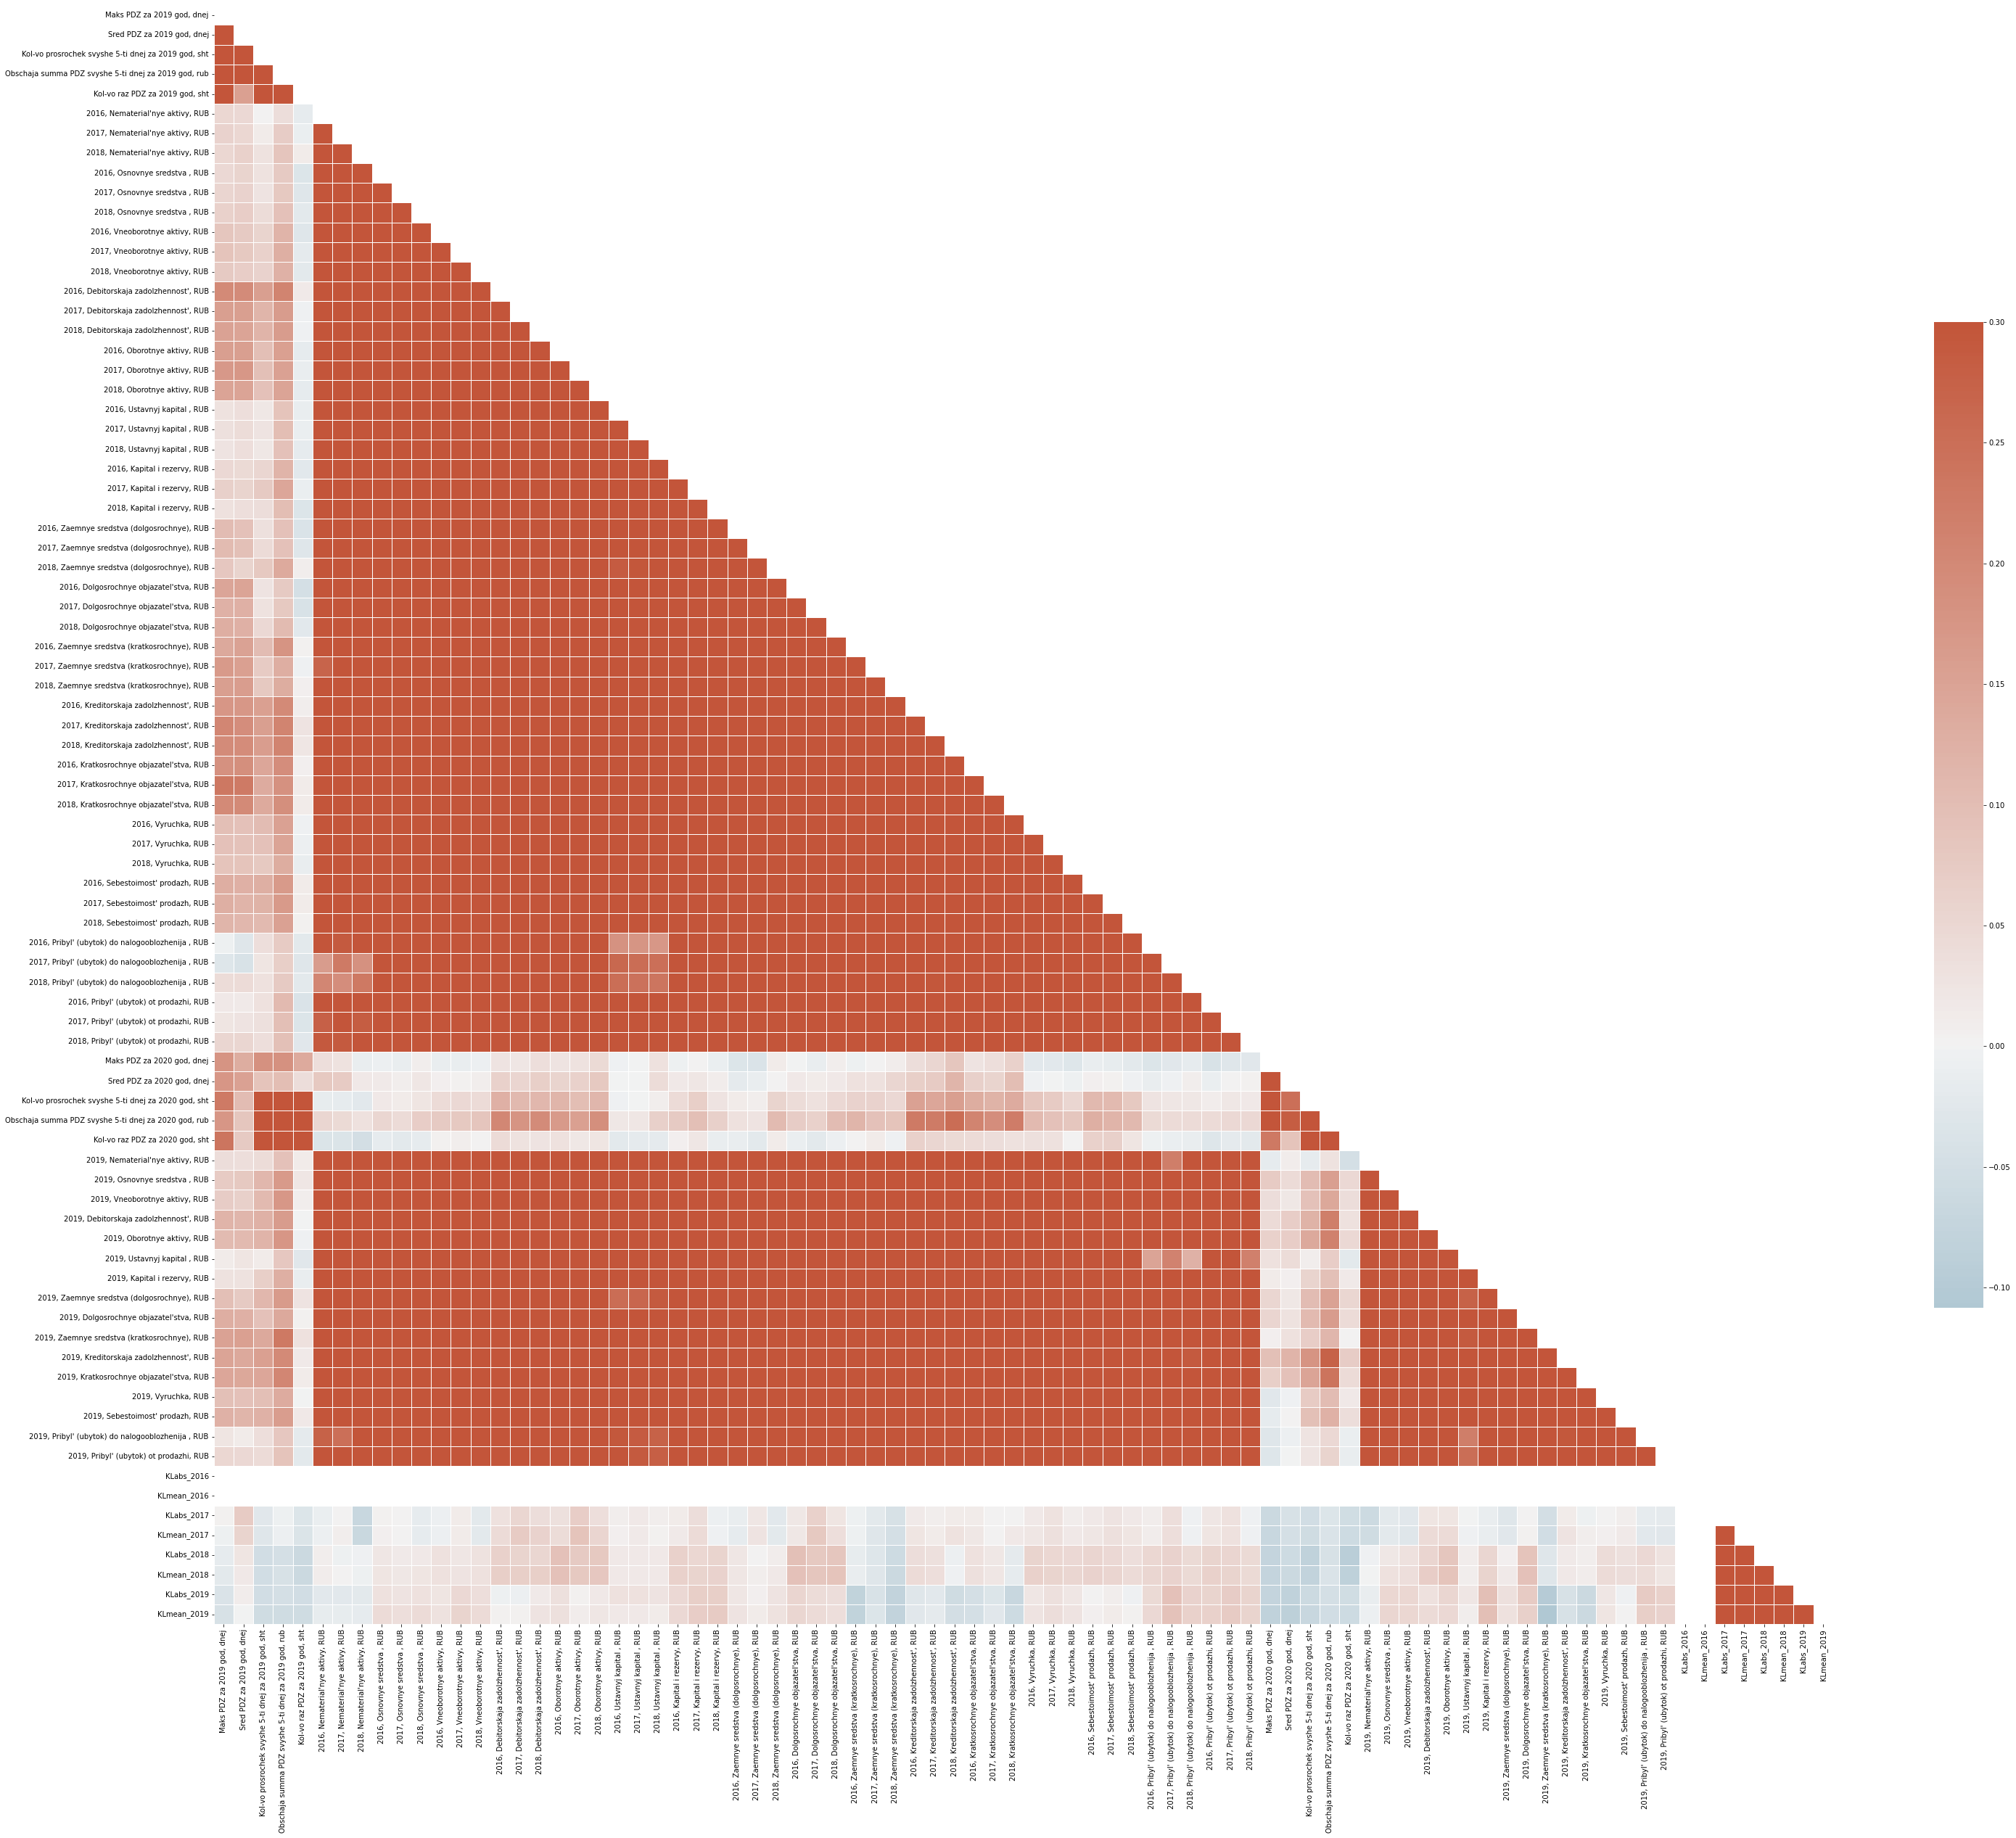

In [12]:
corr = df_union_norm.drop(excluded_columns, axis=1).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(50, 50))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Попытаемся предсказать средний ПДЗ

In [13]:
df_predict2020 = df_union_norm.drop(excluded_columns, axis=1).rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [14]:
X = df_predict2020.drop(['SredPDZza2020goddnej'], axis=1)
y = df_predict2020['SredPDZza2020goddnej']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Пробуем sklearn

In [15]:
#regr = linear_model.LinearRegression()
#regr.fit(X_train, y_train)

#y_pred = regr.predict(X_test)
#rmse_test = mean_squared_error(y_test, y_pred) ** 0.5
#print(f'The RMSE of test prediction is: {rmse_test}')
#print('\nnReal PDZ vs Predict PDZ')
#print(list(zip(y_test, y_pred))[:50])


#y_pred = regr.predict(X_train)
#rmse_test = mean_squared_error(y_train, y_pred) ** 0.5
#print(f'\nThe RMSE of train prediction is: {rmse_test}')
#print('\nReal PDZ vs Predict PDZ')
#print(list(zip(y_train, y_pred))[:50])

### Пробуем lightgbm

In [16]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# specify your configurations as a dict
params = {
    'seed': 42,
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 20,
    'learning_rate': 0.05,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.7,
    'bagging_freq': 4,
    'verbose': 0
}

gbm = lgb.train(params,
                lgb_train,
                num_boost_round=2000,
                valid_sets=lgb_eval,
                callbacks=[lgb.early_stopping(stopping_rounds=20)])

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001559 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

In [17]:
y_pred = gbm.predict(X_train, num_iteration=gbm.best_iteration)
rmse_test = mean_squared_error(y_train, y_pred) ** 0.5
print(f'\nThe RMSE of train prediction is: {rmse_test}')
print('\nReal PDZ vs Predict PDZ')
print(list(zip(y_train, y_pred))[:50])

y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
rmse_test = mean_squared_error(y_test, y_pred) ** 0.5
print(f'\nThe RMSE of test prediction is: {rmse_test}')
print('\nReal PDZ vs Predict PDZ')
print(list(zip(y_test, y_pred))[:50])


The RMSE of train prediction is: 6.9722759934704195

Real PDZ vs Predict PDZ
[(0.0, 0.20131337802771138), (2.230769230769231, 2.18331313119895), (0.0, 0.28168051295608504), (2.0, 1.7458523006282634), (1.0, 1.3439132501455484), (3.6875, 3.7645791854113386), (1.285714285714286, 5.083759213106342), (0.0, 0.15679620329955615), (0.0, 0.10785804727288817), (0.0, 0.4305785162775733), (0.0, 0.39169824957380056), (4.028409090909091, 3.7165302508562017), (13.05555555555556, 41.25931159835225), (4.125, 6.392239580895769), (0.0, -0.05743400375459129), (4.888888888888889, 4.981825819862874), (0.0, 0.21386648056096988), (0.0, 0.46668395806004714), (3.886178861788618, 3.7117630896532523), (0.0, 0.2785079346962093), (1.0, 0.9739776360924592), (0.0, 0.4602349661407382), (0.0, 1.4224910797986414), (68.0909090909091, 48.49275811889546), (5.0, 3.972910346479894), (1.0, 1.0888794220961306), (15.5, 15.240434228810942), (7.422222222222222, 4.905555364497964), (12.3125, 10.30224727956311), (11.0, 11.62196219

### Подсчитываем точность по классификации ПДЗ [0, 1-30, 31-90, 91-365]

In [22]:
def calc_aquracy_classification(a, b):
    # Просрочку предсказанную меньше чем 1 день, считаем за 0
    y_pred = a.copy()
    y_test = b.copy()
    
    y_pred = np.around(y_pred)
    y_pred = np.where(y_pred<1.0001, 0.0, y_pred)
    y_pred = np.where(np.logical_and(y_pred>1.0, y_pred < 31.0), 1.0, y_pred)
    y_pred = np.where(np.logical_and(y_pred>30, y_pred < 91), 2.0, y_pred)
    y_pred = np.where(np.logical_and(y_pred>90, y_pred < 1001), 3.0, y_pred)

    y_test = np.around(y_test)
    y_test = np.where(y_test<1.0001, 0.0, y_test)
    y_test = np.where(np.logical_and(y_test>1 , y_test < 31), 1.0, y_test)
    y_test = np.where(np.logical_and(y_test>30 , y_test < 91), 2.0, y_test)
    y_test = np.where(np.logical_and(y_test>90 , y_test < 1001), 3.0, y_test)
    
    coincidences = [1 if x[0]==x[1] else 0 for x in list(zip(y_test, y_pred))]
    
    
    print(list(zip(y_test, y_pred))[:100])
    return sum(coincidences) / len(coincidences)
    

y_pred = gbm.predict(X_train, num_iteration=gbm.best_iteration)
accuracy = calc_aquracy_classification(y_pred, y_train)  
print('\nTrain dataset acuracy', accuracy, '\n')

y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
accuracy = calc_aquracy_classification(y_pred, y_test)
print('\nTest dataset acuracy', accuracy, '\n')   

[(0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 2.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (2.0, 2.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (2.0, 2.0), (0.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.

### Проводим кластеризацию компаний